# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

**The variables we would need to dummify are our categorical variables, such that we would do it with gender and species. Our reference group would be the entry assigned the value 0. In the instance of specieis, we would have 3 categories such that only 2 additional variables are included in the multiple regression.**

In [2]:
!pip install palmerpenguins

In [3]:
import sklearn
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [4]:
penguins_df = load_penguins().dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
penguins_df["bill_length_mm"].describe()

,bill_length_mm
count,333.000000
mean,43.992793
std,5.468668
min,32.100000
25%,39.500000
50%,44.500000
75%,48.600000
max,59.600000


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [6]:
linear_penguin = LinearRegression()
linear_penguin.fit(X=penguins_df[["bill_length_mm"]],
                   y=penguins_df[["bill_depth_mm"]]
                   )

LinearRegression()

In [7]:
penguins_df["bill_depth_pred"] = linear_penguin.predict(penguins_df[["bill_length_mm"]])

In [8]:
linear_penguin.coef_, linear_penguin.intercept_

(array([[-0.08232675]]), array([20.78664867]))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_pred'>

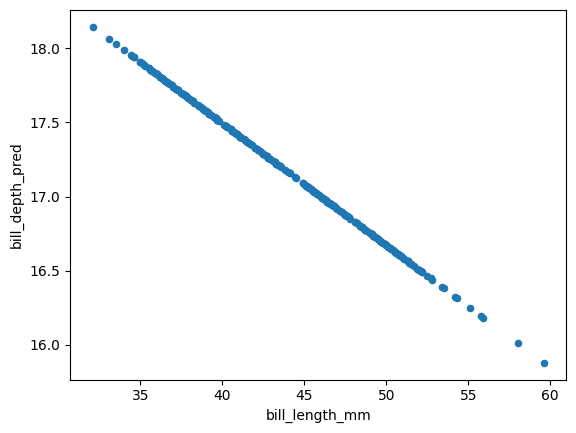

In [9]:
penguins_df.plot.scatter(x="bill_length_mm", y="bill_depth_pred")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

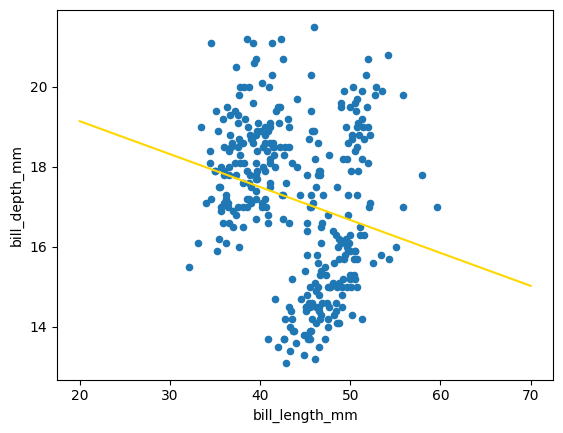

In [37]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(20, 70, num=1000)
y_new = pd.Series(
    linear_penguin.predict(X_new).flatten(),
    index=X_new["bill_length_mm"]
)

penguins_df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new.plot.line(c = "gold")

##**Making the quadratic and cubic models**

In [11]:
penguins_df["bill_length_squared"] = penguins_df["bill_length_mm"] ** 2
penguins_df["bill_length_cubed"] = penguins_df["bill_length_mm"] ** 3
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_pred,bill_length_squared,bill_length_cubed
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457


In [12]:
square_model = LinearRegression()
square_model.fit(X=penguins_df[["bill_length_mm", "bill_length_squared"]],
                 y=penguins_df["bill_depth_mm"])

LinearRegression()

In [15]:
penguins_df["depth_square_pred"] = square_model.predict(penguins_df[["bill_length_mm", "bill_length_squared"]])
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_pred,bill_length_squared,bill_length_cubed,depth_square_pred
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471,17.497696
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875,17.407049
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827,17.240135
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863,18.142249
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457,17.451773


<Axes: xlabel='bill_length_mm', ylabel='depth_square_pred'>

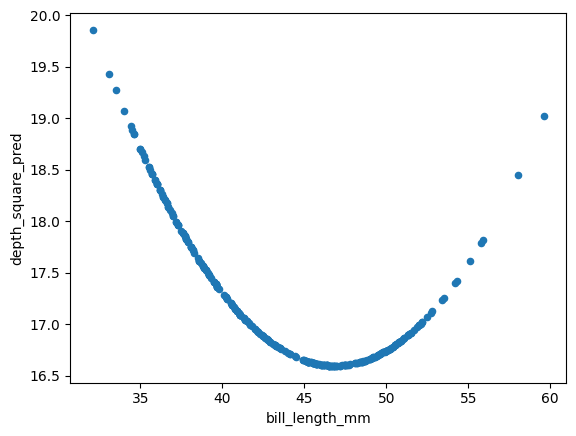

In [17]:
penguins_df.plot.scatter(x="bill_length_mm", y="depth_square_pred")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

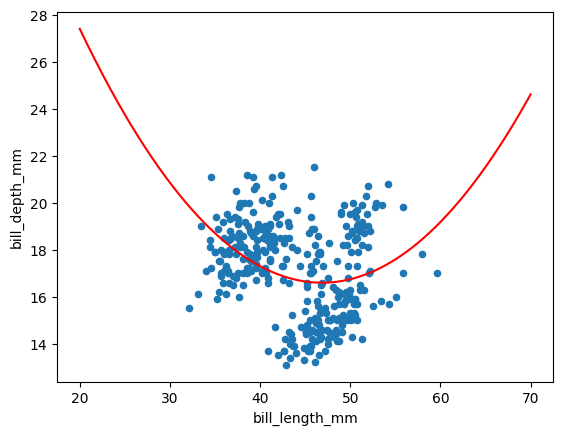

In [18]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(20, 70, num=1000)
X_new["bill_length_squared"] = X_new["bill_length_mm"] ** 2
y_new_square = pd.Series(
    square_model.predict(X_new).flatten(),
    index=X_new["bill_length_mm"]
)

penguins_df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_square.plot.line(c = "red")

In [20]:
cubic_model = LinearRegression()
cubic_model.fit(X=penguins_df[["bill_length_mm", "bill_length_squared","bill_length_cubed"]],
                 y=penguins_df["bill_depth_mm"])

LinearRegression()

In [21]:
penguins_df["depth_cubic_pred"] = cubic_model.predict(penguins_df[["bill_length_mm", "bill_length_squared","bill_length_cubed"]])
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_pred,bill_length_squared,bill_length_cubed,depth_square_pred,depth_cubic_pred
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471,17.497696,17.766833
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875,17.407049,17.693524
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827,17.240135,17.540285
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863,18.142249,18.127376
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457,17.451773,17.730509


<Axes: xlabel='bill_length_mm', ylabel='depth_cubic_pred'>

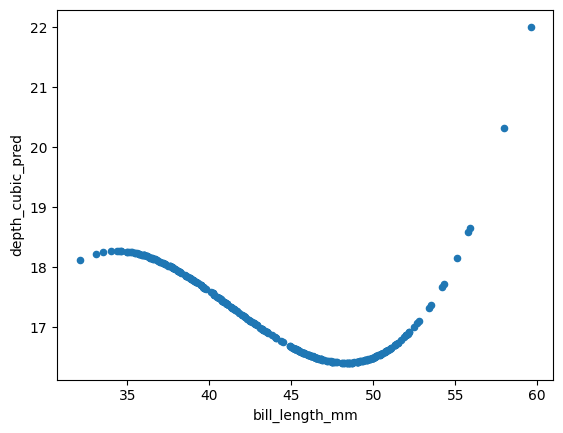

In [22]:
penguins_df.plot.scatter(x="bill_length_mm", y="depth_cubic_pred")

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

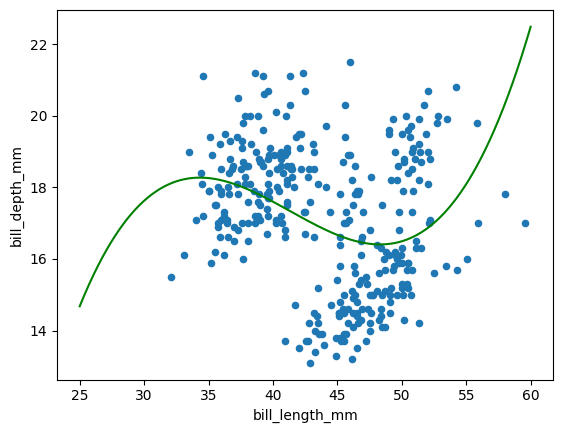

In [24]:
X_newc = pd.DataFrame()
X_newc["bill_length_mm"] = np.linspace(25, 60, num=1000)
X_newc["bill_length_squared"] = X_newc["bill_length_mm"] ** 2
X_newc["bill_length_cubed"] = X_newc["bill_length_mm"] ** 3
y_new_cube = pd.Series(
    cubic_model.predict(X_newc).flatten(),
    index=X_newc["bill_length_mm"]
)

penguins_df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_cube.plot.line(c="green", label="Cubic")

Now, here's the degree 10 polynomial

In [25]:
penguins_df["bill_length_deg4"] = penguins_df["bill_length_mm"] ** 4
penguins_df["bill_length_deg5"] = penguins_df["bill_length_mm"] ** 5
penguins_df["bill_length_deg6"] = penguins_df["bill_length_mm"] ** 6
penguins_df["bill_length_deg7"] = penguins_df["bill_length_mm"] ** 7
penguins_df["bill_length_deg8"] = penguins_df["bill_length_mm"] ** 8
penguins_df["bill_length_deg9"] = penguins_df["bill_length_mm"] ** 9
penguins_df["bill_length_deg10"] = penguins_df["bill_length_mm"] ** 10
penguins_df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_pred,bill_length_squared,bill_length_cubed,depth_square_pred,depth_cubic_pred,bill_length_deg4,bill_length_deg5,bill_length_deg6,bill_length_deg7,bill_length_deg8,bill_length_deg9,bill_length_deg10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,59776.471,17.497696,17.766833,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,61629.875,17.407049,17.693524,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,65450.827,17.240135,17.540285,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,49430.863,18.142249,18.127376,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,60698.457,17.451773,17.730509,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15


In [26]:
deg10_model = LinearRegression()
deg10_model.fit(X=penguins_df[["bill_length_mm", "bill_length_squared","bill_length_cubed", "bill_length_deg4","bill_length_deg5",
                                                              "bill_length_deg6", "bill_length_deg7","bill_length_deg8","bill_length_deg9","bill_length_deg10"]],
                 y=penguins_df["bill_depth_mm"])

LinearRegression()

In [27]:
penguins_df["depth_deg10"] = deg10_model.predict(penguins_df[["bill_length_mm", "bill_length_squared","bill_length_cubed", "bill_length_deg4","bill_length_deg5",
                                                              "bill_length_deg6", "bill_length_deg7","bill_length_deg8","bill_length_deg9","bill_length_deg10"]])
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_pred,bill_length_squared,...,depth_square_pred,depth_cubic_pred,bill_length_deg4,bill_length_deg5,bill_length_deg6,bill_length_deg7,bill_length_deg8,bill_length_deg9,bill_length_deg10,depth_deg10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,1528.81,...,17.497696,17.766833,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15,18.392434
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,1560.25,...,17.407049,17.693524,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15,18.272268
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,1624.09,...,17.240135,17.540285,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16,17.969702
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,1346.89,...,18.142249,18.127376,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15,18.483352
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,1544.49,...,17.451773,17.730509,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15,18.335297


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

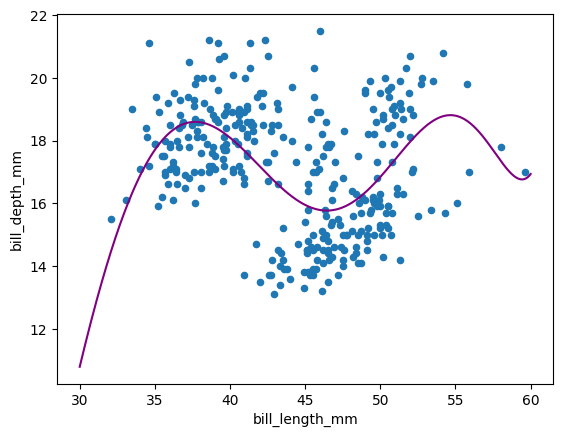

In [34]:
X_newd10 = pd.DataFrame()
X_newd10["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_newd10["bill_length_squared"] = X_newd10["bill_length_mm"] ** 2
X_newd10["bill_length_cubed"] = X_newd10["bill_length_mm"] ** 3
X_newd10["bill_length_deg4"] = X_newd10["bill_length_mm"] ** 4
X_newd10["bill_length_deg5"] = X_newd10["bill_length_mm"] ** 5
X_newd10["bill_length_deg6"] = X_newd10["bill_length_mm"] ** 6
X_newd10["bill_length_deg7"] = X_newd10["bill_length_mm"] ** 7
X_newd10["bill_length_deg8"] = X_newd10["bill_length_mm"] ** 8
X_newd10["bill_length_deg9"] = X_newd10["bill_length_mm"] ** 9
X_newd10["bill_length_deg10"] = X_newd10["bill_length_mm"] ** 10
y_new_deg10 = pd.Series(
    deg10_model.predict(X_newd10).flatten(),
    index=X_newd10["bill_length_mm"]
)

penguins_df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_deg10.plot.line(c="purple", label="Degree 10")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

**Underfitting:** Both the linear and quadratic are underfitting such that are missing a lot of the values and not meeting the shape of the plot.

**Overfit:** The degree 10 polynomial is the only one that is overfitting because it's wiggling too  much and not really capturing the trend of the data.

**Best Model:** The cubic model is the best fit as it captures the change in direction of the scatterplot by best trying to fit the pattern of the scatterplot.


